# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make prediction, we will consider a NN that depend on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [1]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [2]:
import numpy as np

# generate training inputs
np.random.seed(0)
#100 dati di training e 10 dati di validation
x_train = np.random.uniform(-1, 1, 100)
x_valid = np.random.uniform(-1, 1, 10)
#ordina i dati di validation
x_valid.sort()
#funzione esatta
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

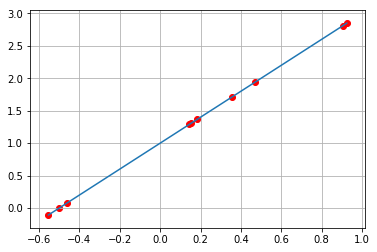

In [3]:
# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')

plt.grid(True); plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [4]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [5]:
# get a summary of our composed model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [6]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 100 samples, validate on 10 samples
Epoch 1/30
100/100 [==============================] - 2s 24ms/step - loss: 1.8066 - mean_squared_error: 1.8066 - val_loss: 2.2363 - val_mean_squared_error: 2.2363
Epoch 2/30
100/100 [==============================] - 0s 131us/step - loss: 1.6458 - mean_squared_error: 1.6458 - val_loss: 2.0373 - val_mean_squared_error: 2.0373
Epoch 3/30
100/100 [==============================] - 0s 108us/step - loss: 1.5051 - mean_squared_error: 1.5051 - val_loss: 1.8353 - val_mean_squared_error: 1.8353
Epoch 4/30
100/100 [==============================] - 0s 121us/step - loss: 1.3653 - mean_squared_error: 1.3653 - val_loss: 1.6706 - val_mean_squared_error: 1.6706
Epoch 5/30
100/100 [==============================] - 0s 134us/step - loss: 1.2510 - mean_squared_error: 1.2510 - val_loss: 1.5226 - val_mean_squared_error: 1.5226
Epoch 6/30
100/100 [==============================] - 0s 146us/step - loss: 1.1484 - mean_squared_error: 1.1484 - val_loss: 1.3865 - val

In [7]:
# return weights
model.get_weights()

[array([[1.1662936]], dtype=float32), array([0.88422686], dtype=float32)]

In [8]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test mean square error:', score[1])

10/10 [==============================] - 0s 136us/step

Test loss: 0.24423404037952423
Test mean square error: 0.24423404037952423


In [9]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test mean square error:', score[1])

10/10 [==============================] - 0s 142us/step

Test loss: 0.24423404037952423
Test mean square error: 0.24423404037952423


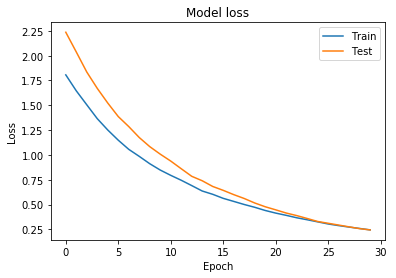

In [10]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

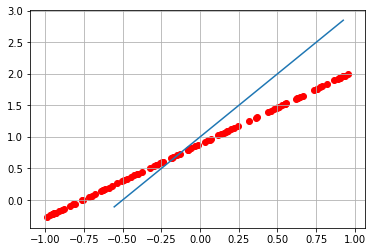

In [11]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

In [20]:
# generate training inputs
np.random.seed(0)
#100 dati di training e 10 dati di validation
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
#ordina i dati di validation
x_valid.sort()
#funzione esatta
y_target = m * x_valid + b # ideal (target) linear function

sigma = 1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

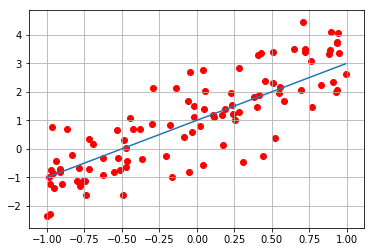

In [21]:
# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')

plt.grid(True); plt.show()

In [22]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=10,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 1000 samples, validate on 100 samples
Epoch 1/10
1000/1000 [==============================] - 0s 36us/step - loss: 0.9509 - mean_squared_error: 0.9509 - val_loss: 0.8350 - val_mean_squared_error: 0.8350
Epoch 2/10
1000/1000 [==============================] - 0s 43us/step - loss: 0.9500 - mean_squared_error: 0.9500 - val_loss: 0.8321 - val_mean_squared_error: 0.8321
Epoch 3/10
1000/1000 [==============================] - 0s 57us/step - loss: 0.9491 - mean_squared_error: 0.9491 - val_loss: 0.8290 - val_mean_squared_error: 0.8290
Epoch 4/10
1000/1000 [==============================] - 0s 62us/step - loss: 0.9491 - mean_squared_error: 0.9491 - val_loss: 0.8275 - val_mean_squared_error: 0.8275
Epoch 5/10
1000/1000 [==============================] - 0s 56us/step - loss: 0.9489 - mean_squared_error: 0.9489 - val_loss: 0.8264 - val_mean_squared_error: 0.8264
Epoch 6/10
1000/1000 [==============================] - 0s 47us/step - loss: 0.9488 - mean_squared_error: 0.9488 - val_loss: 0.8

In [15]:
# return weights
model.get_weights()

[array([[1.9130117]], dtype=float32), array([1.0288168], dtype=float32)]

In [16]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

100/100 [==============================] - 0s 47us/step

Test loss: 0.8394785451889039
Test accuracy: 0.8394785451889039


In [17]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

100/100 [==============================] - 0s 81us/step

Test loss: 0.003961512753739953
Test accuracy: 0.003961512753739953


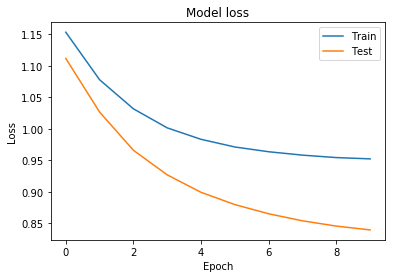

In [18]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

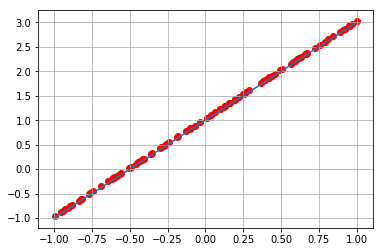

In [23]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Also with a big noise ( $\sigma = 1.0$ ) the NN works well. I think it is due to the fact that the model is too simple and it is able to fit well straight line, that is what we have! If we didn't know the result we could think that the model is too simple, looking to the loss. For a more complicated model with the same noise I expect an overfitting of the data.  

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In order to make practice with NN, explore reasonable different choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Make graphs comparing fits for different NNs.
Check your NN models by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

In [24]:
a=4
b=-3
c=-2
d=3


def f(x,a,b,c,d):
    return a+b*x+c*x*x+d*x*x*x

In [25]:
import numpy as np

# generate training inputs
np.random.seed(0)
#100 dati di training e 10 dati di validation
x_train = np.random.uniform(-1, 1.5, 1000)
x_valid = np.random.uniform(-1, 1.5, 100)
#ordina i dati di validation
x_valid.sort()
#funzione esatta
y_target = f(x_valid,a,b,c,d) # ideal (target) linear function

sigma = 1.5 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(f(x_train,a,b,c,d), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(f(x_valid,a,b,c,d), sigma)

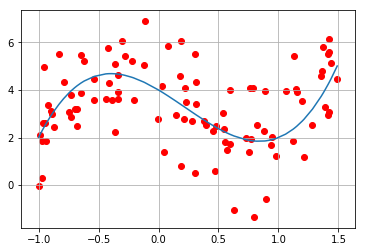

In [26]:
# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')

plt.grid(True); plt.show()

In [27]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model.add(Dense(100,activation='tanh'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [28]:
# get a summary of our composed model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               200       
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 30,603
Trainable params: 30,603
Non-trainable params: 0
_________________________________________________________________


In [29]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 1000 samples, validate on 100 samples
Epoch 1/100
1000/1000 [==============================] - 1s 1ms/step - loss: 6.2756 - mean_squared_error: 6.2756 - val_loss: 2.7461 - val_mean_squared_error: 2.7461
Epoch 2/100
1000/1000 [==============================] - 0s 337us/step - loss: 3.0976 - mean_squared_error: 3.0976 - val_loss: 2.7280 - val_mean_squared_error: 2.7280
Epoch 3/100
1000/1000 [==============================] - 0s 285us/step - loss: 2.9719 - mean_squared_error: 2.9719 - val_loss: 3.2271 - val_mean_squared_error: 3.2271
Epoch 4/100
1000/1000 [==============================] - 1s 511us/step - loss: 2.9559 - mean_squared_error: 2.9559 - val_loss: 2.7873 - val_mean_squared_error: 2.7873
Epoch 5/100
1000/1000 [==============================] - 0s 252us/step - loss: 2.8856 - mean_squared_error: 2.8856 - val_loss: 2.8147 - val_mean_squared_error: 2.8147
Epoch 6/100
1000/1000 [==============================] - 0s 274us/step - loss: 2.8645 - mean_squared_error: 2.8645 - val

1000/1000 [==============================] - 0s 266us/step - loss: 2.2091 - mean_squared_error: 2.2091 - val_loss: 2.1835 - val_mean_squared_error: 2.1835
Epoch 50/100
1000/1000 [==============================] - 0s 264us/step - loss: 2.2563 - mean_squared_error: 2.2563 - val_loss: 1.9848 - val_mean_squared_error: 1.9848
Epoch 51/100
1000/1000 [==============================] - 0s 214us/step - loss: 2.2245 - mean_squared_error: 2.2245 - val_loss: 2.7994 - val_mean_squared_error: 2.7994
Epoch 52/100
1000/1000 [==============================] - 0s 226us/step - loss: 2.2727 - mean_squared_error: 2.2727 - val_loss: 1.8975 - val_mean_squared_error: 1.8975
Epoch 53/100
1000/1000 [==============================] - 1s 612us/step - loss: 2.2513 - mean_squared_error: 2.2513 - val_loss: 1.9429 - val_mean_squared_error: 1.9429
Epoch 54/100
1000/1000 [==============================] - 0s 437us/step - loss: 2.2239 - mean_squared_error: 2.2239 - val_loss: 1.9182 - val_mean_squared_error: 1.9182
Epoch

1000/1000 [==============================] - 0s 301us/step - loss: 2.1881 - mean_squared_error: 2.1881 - val_loss: 2.0832 - val_mean_squared_error: 2.0832
Epoch 98/100
1000/1000 [==============================] - 1s 685us/step - loss: 2.2191 - mean_squared_error: 2.2191 - val_loss: 2.0048 - val_mean_squared_error: 2.0048
Epoch 99/100
1000/1000 [==============================] - 0s 425us/step - loss: 2.1756 - mean_squared_error: 2.1756 - val_loss: 1.8888 - val_mean_squared_error: 1.8888
Epoch 100/100
1000/1000 [==============================] - 0s 373us/step - loss: 2.1928 - mean_squared_error: 2.1928 - val_loss: 1.9366 - val_mean_squared_error: 1.9366


In [30]:
#model.get_weights()

In [31]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test mean square value:', score[1])

100/100 [==============================] - 0s 448us/step

Test loss: 1.9365747451782227
Test mean square value: 1.9365747451782227


In [32]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test mean square value:', score[1])

100/100 [==============================] - 0s 261us/step

Test loss: 0.08745130896568298
Test mean square value: 0.08745130896568298


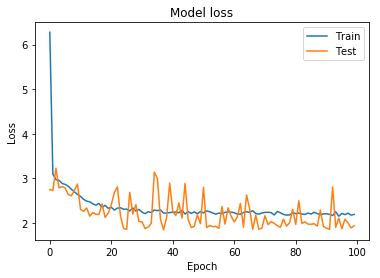

In [33]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

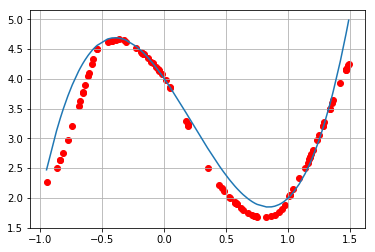

In [34]:
x_predicted = np.random.uniform(-1, 1.5, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
x_predicted.sort()
y_target = f(x_predicted,a,b,c,d) # ideal (target) linear function
plt.plot(x_predicted,y_target)

plt.grid(True)
plt.show()

This exercise shows the importance of having a sufficiently complicated model. With two layers the fit is complitely wrong. Adding one or two more layer with 20 n. things are different, but still not acceptable. 
Finally, if we add another layer the model starts to works very well. 
In the final configuration I added a noise $\sigma = 0.7 $. Altough the data are quite terrible it seems to find the rigth shape, with a little shift. Now, raising the number of epochs to 100, the fit returns to be very acceptable!
Finally, I searched for the overfitting threshold. I've given up! the model continues to works well also with a very big noise ($ \sigma=1.7$) and a very complicated sequence of layer.  

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

In [31]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x,y):
    return np.sin(x**2.+y**2.)

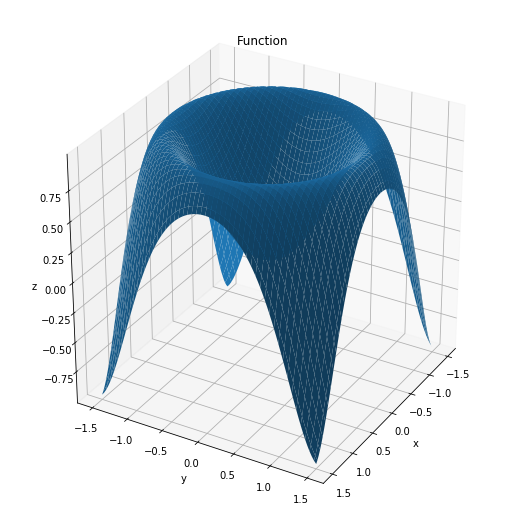

In [32]:
x=np.linspace(-1.5,1.5,100)
y=np.linspace(-1.5,1.5,100)

ax = Axes3D(fig=plt.figure(figsize=(7,7)))
x,y=np.meshgrid(x,y)
z=f(x,y)
ax.plot_surface(x, y, z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Function")
ax.view_init(30, 30)
plt.show()

In [33]:
# generate training inputs
np.random.seed(0)
#100 dati di training e 10 dati di validation
n_train=5000
n_valid=500
sigma=0.1

x_train=np.zeros((n_train, 2))
y_train=np.zeros((n_train,1))
for i in range(n_train):
    x_train[i][0]=np.random.uniform(-1.5,1.5)
    x_train[i][1]=np.random.uniform(-1.5,1.5)
    y_train[i]=np.random.normal(f(x_train[i][0],x_train[i][1]),sigma)


x_valid = np.zeros((n_valid,2))
y_valid = np.zeros((n_valid,1))
Xplot=np.zeros((n_valid,1))
Yplot=np.zeros((n_valid,1))
for i in range(n_valid):
    x_valid[i][0]=np.random.uniform(-1.5,1.5)
    x_valid[i][1]=np.random.uniform(-1.5,1.5)
    Xplot[i]=x_valid[i][0]
    Yplot[i]=x_valid[i][1]
    y_valid[i]=np.random.normal(f(x_valid[i][0],x_valid[i][1]),sigma)
    #Quello esatto

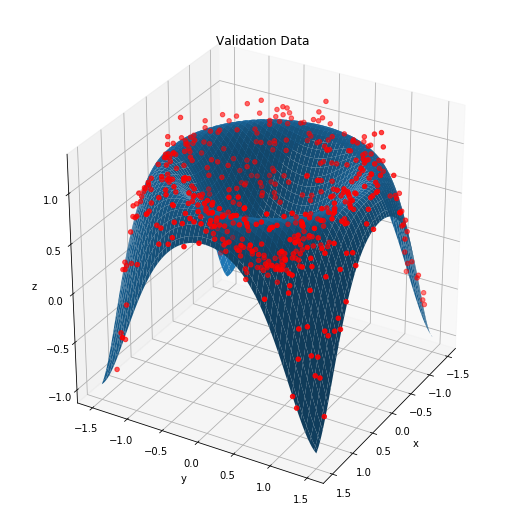

In [34]:
# plot training and target dataset
ax = Axes3D(fig=plt.figure(figsize=(7,7)))

ax.scatter(Xplot,Yplot,y_valid, color='r')
z=f(x,y)
ax.plot_surface(x,y,z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Validation Data")
ax.view_init(30, 30)

plt.grid(True); plt.show()

In [35]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(2, input_shape=(2,)))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [36]:
# get a summary of our composed model
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_8 (Dense)              (None, 30)                90        
_________________________________________________________________
dense_9 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_10 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 31        
Total params: 1,987
Trainable params: 1,987
Non-trainable params: 0
_________________________________________________________________


In [37]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
X_TRAIN=(x_train,y_train)
X_VALID=(x_valid,y_valid)
history = model.fit(x=x_train,y=y_train ,
          batch_size=32, epochs=100,       
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))


Train on 5000 samples, validate on 500 samples
Epoch 1/100
5000/5000 [==============================] - 4s 781us/step - loss: 0.1948 - mean_squared_error: 0.1948 - val_loss: 0.1486 - val_mean_squared_error: 0.1486
Epoch 2/100
5000/5000 [==============================] - 2s 468us/step - loss: 0.1496 - mean_squared_error: 0.1496 - val_loss: 0.1453 - val_mean_squared_error: 0.1453
Epoch 3/100
5000/5000 [==============================] - 3s 502us/step - loss: 0.1461 - mean_squared_error: 0.1461 - val_loss: 0.1414 - val_mean_squared_error: 0.1414
Epoch 4/100
5000/5000 [==============================] - 2s 394us/step - loss: 0.1426 - mean_squared_error: 0.1426 - val_loss: 0.1396 - val_mean_squared_error: 0.1396
Epoch 5/100
5000/5000 [==============================] - 2s 364us/step - loss: 0.1393 - mean_squared_error: 0.1393 - val_loss: 0.1338 - val_mean_squared_error: 0.1338
Epoch 6/100
5000/5000 [==============================] - 2s 444us/step - loss: 0.1356 - mean_squared_error: 0.1356 - v

5000/5000 [==============================] - 2s 386us/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 98/100
5000/5000 [==============================] - 2s 436us/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0124 - val_mean_squared_error: 0.0124
Epoch 99/100
5000/5000 [==============================] - 3s 560us/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 100/100
5000/5000 [==============================] - 3s 559us/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0124 - val_mean_squared_error: 0.0124


In [38]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test mean square value:', score[1])

500/500 [==============================] - 0s 543us/step

Test loss: 0.0123865020647645
Test mean square value: 0.0123865020647645


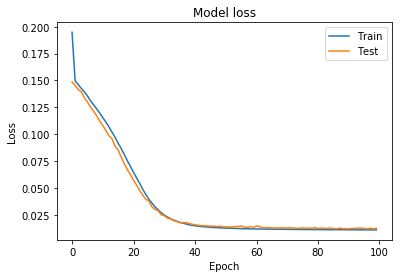

In [39]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

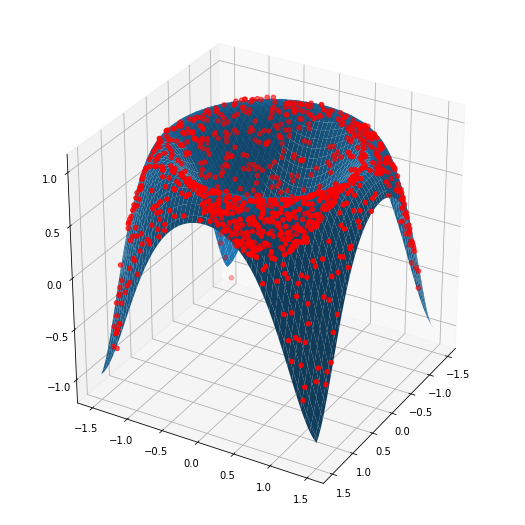

In [40]:
ax = Axes3D(fig=plt.figure(figsize=(7,7)))


x_predicted=np.zeros((1000, 2))
Xplot=np.zeros((1000,1))
Yplot=np.zeros((1000,1))

for i in range(1000):
    x_predicted[i][0]=np.random.uniform(-1.5,1.5)
    Xplot[i]=x_predicted[i][0]
    x_predicted[i][1]=np.random.uniform(-1.5,1.5)
    Yplot[i]=x_predicted[i][1]
    
y_predicted = model.predict(x_predicted)


ax.scatter(Xplot, Yplot,y_predicted,color='r')
ax.plot_surface(x,y,z)
ax.view_init(30, 30)
plt.grid(True)
plt.show()

Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>

### <span style="color:green">Supplementary material: Keras model.fit available callbacks</span>

The .fit method can also get <a href=https://keras.io/callbacks/>callback</a> functions which can be used to customize the fitting procedure with special actions.

Keras provides some predefined callbacks to feed in, among them for example:
- **TerminateOnNaN()**: that terminates training when a NaN loss is encountered
- **ModelCheckpoint(filepath)**: that save the model after every epoch
- **EarlyStopping()**: which stop training when a monitored quantity has stopped improving

You can select one or more callback and pass them as a list to the callback argument of the fit method.

Now we are going to construct a callback object to represent how estimated parameters are converging during the training procedure

In [41]:
from IPython.display import clear_output

class PlotCurrentEstimate(tf.keras.callbacks.Callback):
    def __init__(self, x_valid, y_valid):
        """Keras Callback which plot current model estimate against reference target"""
        
        # convert numpy arrays into lists for plotting purposes
        self.x_valid = list(x_valid[:])
        self.y_valid = list(y_valid[:])
        self.iter=0

    def on_epoch_end(self, epoch, logs={}):
        
        temp = self.model.predict(self.x_valid, batch_size=None, verbose=False, steps=None)
        self.y_curr = list(temp[:]) # convert numpy array into list
        
        self.iter+=1
        if self.iter%10 == 0:
            clear_output(wait=True)            
            self.eplot = plt.subplot(1,1,1)
            self.eplot.clear()     
            self.eplot.scatter(self.x_valid, self.y_curr, color="blue", s=4, marker="o", label="estimate")
            self.eplot.scatter(self.x_valid, self.y_valid, color="red", s=4, marker="x", label="valid")
            self.eplot.legend()

            plt.show()

We will use also an EarlyStopping callback on the val_loss quantity. This will stop the training process as soon as the val_loss quantity does not improve anymore after an amount of epochs, preventing a long time of wated computation to take over without useful results.

<code>keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)</code>

Arguments:

- <code>monitor</code>: quantity to be monitored. 
- <code>min_delta:</code> minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement. 
- <code>patience:</code> number of epochs with no improvement after which training will be stopped. 
- <code>verbose:</code> verbosity mode. 
- <code>mode:</code> one of {auto, min, max}. In min mode, training will stop when the quantity monitored has stopped decreasing; in max mode it will stop when the quantity monitored has stopped increasing; in auto mode, the direction is automatically inferred from the name of the monitored quantity. 
- <code>baseline:</code> Baseline value for the monitored quantity to reach. Training will stop if the model doesn't show improvement over the baseline. 
- <code>restore_best_weights:</code> whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used.

In [42]:
plot_estimate = PlotCurrentEstimate(x_valid, y_valid)

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                  min_delta=0, patience=100, mode='auto')

model.fit(x_valid, y_valid, batch_size=32, epochs=150,
          validation_data=(x_valid, y_valid),
          callbacks=[ plot_estimate, earlystop]
          )

model.get_weights()

Train on 500 samples, validate on 500 samples
Epoch 1/150
480/500 [===========================>..] - ETA: 0s - loss: 0.0116 - mean_squared_error: 0.0116

ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), but instead got the following list of 500 arrays: [array([[1.41106944],
       [0.58435965]]), array([[ 0.58557974],
       [-0.72270293]]), array([[-0.58186509],
       [ 0.46534417]]), array([[0.31703845],
       [0.5107891 ]]), array([[-1.05126093...